11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1231 - loss: 2.3234 - val_accuracy: 0.1620 - val_loss: 2.2371
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1718 - loss: 2.2215 - val_accuracy: 0.2298 - val_loss: 2.1502
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2490 - loss: 2.1416 - val_accuracy: 0.3433 - val_loss: 2.0673
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3516 - loss: 2.0602 - val_accuracy: 0.4417 - val_loss: 1.9819
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4445 - loss: 1.9751 - val_accuracy: 0.5260 - val_loss: 1.8921
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5185 - loss: 1.8895 - val_accuracy: 0.5942 - val_loss: 1.7983
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5802 - loss: 1.7986 - val_accuracy: 0.6462 - val_loss: 1.7028
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6211 - loss: 1.7069 - 

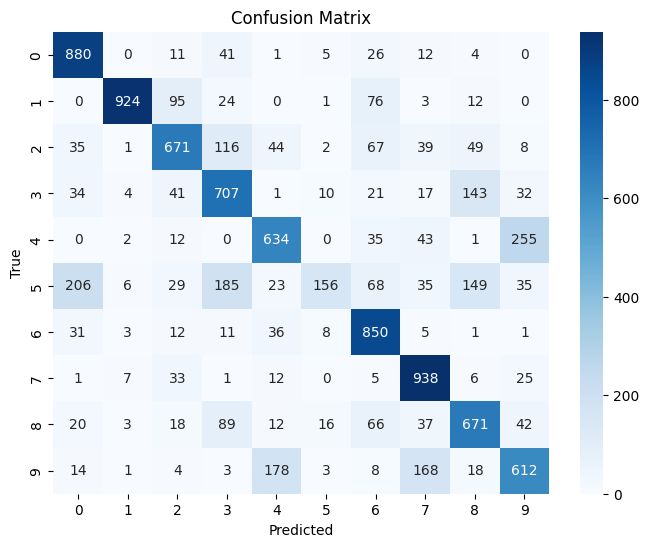

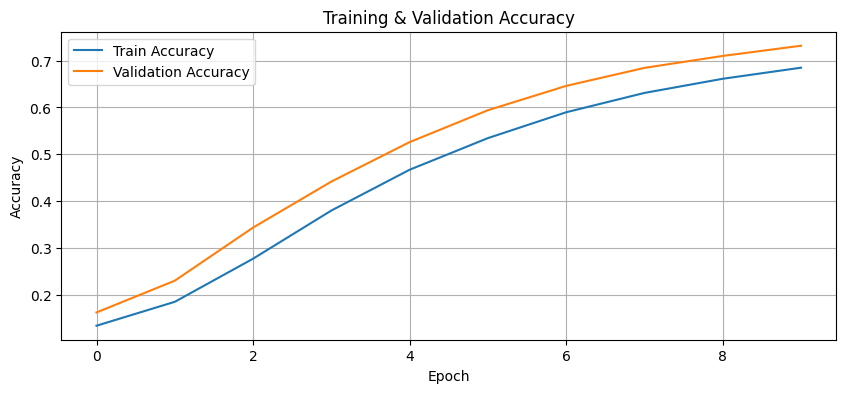

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model using SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Predict classes
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

How to Read the Plots
🔷 1. Confusion Matrix
Each cell shows how many examples of digit i were predicted as digit j.

Ideal scenario: High values on the diagonal (correct predictions).

Off-diagonal values indicate misclassifications.

Use this to understand which digits the model struggles with (e.g., 4 vs. 9).

🔷 2. Training & Validation Accuracy Plot
Shows learning behavior over 10 epochs.

Training accuracy: Model’s accuracy on training data.

Validation accuracy: Performance on unseen data (10% of training set).

If accuracy is low and flat, the learning rate may be too small (which is likely the case here).

🔍 Results Interpretation
SGD with lr = 0.0001 is very slow to converge. Expect:

Lower accuracy compared to Adam or RMSprop.

Small improvements over epochs.

The accuracy plot helps identify if the model is still underfitting (flat curves).

The classification report shows precision/recall/F1 for each digit class — useful to find weak spots.

The confusion matrix reveals where most errors occur.


# Conclusion

The model structure is identical in each experiment.

The optimizer plays a major role in:

Convergence speed

Final accuracy

SGD with a very low learning rate (0.0001) learns very slowly. It can be improved by:

Increasing the learning rate (e.g., to 0.01)

Using momentum or learning rate decay

Let me know if you want the full analysis for RMSprop or a combined performance chart of all 3 optimizers.